In [1]:
import numpy as np
import pandas as pd
from visits import Visit, Cohort, rolling_autocorrelation
import glob
import pymannkendall as mk
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
hr_averages_c1 = pd.read_csv("averages_data/hr_averages_c1.csv", sep=",")
rr_averages_c1 = pd.read_csv("averages_data/rr_averages_c1.csv", sep=",")
abf_averages_c1 = pd.read_csv("averages_data/abf_averages_c1.csv", sep=",")

hr_averages_c3 = pd.read_csv("averages_data/hr_averages_c3.csv", sep=",")
rr_averages_c3 = pd.read_csv("averages_data/rr_averages_c3.csv", sep=",")
abf_averages_c3 = pd.read_csv("averages_data/abf_averages_c3.csv", sep=",")

hr_averages_c4 = pd.read_csv("averages_data/hr_averages_c4.csv", sep=",")
rr_averages_c4 = pd.read_csv("averages_data/rr_averages_c4.csv", sep=",")
abf_averages_c4 = pd.read_csv("averages_data/abf_averages_c4.csv", sep=",")


In [3]:
hr_averages_c1 = hr_averages_c1.dropna()
rr_averages_c1 = rr_averages_c1.dropna()
abf_averages_c1 = abf_averages_c1.dropna()

hr_averages_c3 = hr_averages_c3.dropna()
rr_averages_c3 = rr_averages_c3.dropna()
abf_averages_c3 = abf_averages_c3.dropna()

hr_averages_c4 = hr_averages_c4.dropna()
rr_averages_c4 = rr_averages_c4.dropna()
abf_averages_c4 = abf_averages_c4.dropna()

In [84]:
def remove_outliers(df, n=3):
    med = df['var_percent_increase'].median()
    sigma = df['var_percent_increase'].std()

    df_no_outliers = df.copy()

    for idx, val in enumerate(df_no_outliers['var_percent_increase']):
        if not (med - n*sigma < val < med + n*sigma):
            df_no_outliers['var_percent_increase'].iloc[idx] = med

    med = df['ac_percent_increase'].median()
    sigma = df['ac_percent_increase'].std()

    for idx, val in enumerate(df_no_outliers['ac_percent_increase']):
        if not (med - n*sigma < val < med + n*sigma):
            df_no_outliers['ac_percent_increase'].iloc[idx] = med

    return df_no_outliers

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,  5.,  9., 11., 23., 23.,
        12.,  8.,  2.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  3.]),
 array([-516.26251483, -502.62244403, -488.98237323, -475.34230242,
        -461.70223162, -448.06216082, -434.42209002, -420.78201921,
        -407.14194841, -393.50187761, -379.8618068 , -366.221736  ,
        -352.5816652 , -338.9415944 , -325.30152359, -311.66145279,
        -298.02138199, -284.38131118, -270.74124038, -257.10116958,
        -243.46109878, -229.82102797, -216.18095717, -202.54088637,
        -188.90081556, -175.26074476, -161.62067396, -147.98060316,
        -134.34053235, -120.70046155, -107.06039075,  -93.42031994,
         -79.78024914,  -66.14017834,  -52.50010754,  -38.86003673,
         -25.21996593,  -11.57989513,    2.06017568,   15.70024648,
          29.34031728,   42.98038808

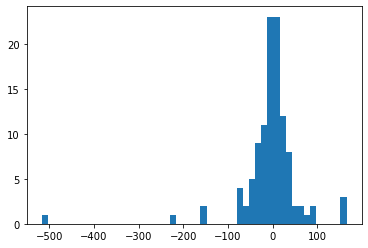

In [85]:
plt.hist(hr_averages_c1['var_diff'], bins=50)


In [5]:
p_vals = []

In [6]:
s, p = stats.ttest_rel(hr_averages_c1["var_hr_1"], hr_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [7]:
s, p = stats.ttest_rel(hr_averages_c1["ac_hr_1"], hr_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [8]:
s, p = stats.ttest_rel(rr_averages_c1["var_hr_1"], rr_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [9]:
s, p = stats.ttest_rel(rr_averages_c1["ac_hr_1"], rr_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [10]:
s, p = stats.ttest_rel(abf_averages_c1["var_hr_1"], abf_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [11]:
s, p = stats.ttest_rel(abf_averages_c1["ac_hr_1"], abf_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [12]:
p_vals

[0.7621912976872469,
 0.05538305025203344,
 0.9489655267460142,
 0.3990104495718137,
 0.15956791385898536,
 0.19889526482169018]

In [13]:
p_vals_c3 = []
s, p = stats.ttest_rel(hr_averages_c3["var_hr_1"], hr_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(hr_averages_c3["ac_hr_1"], hr_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(rr_averages_c3["var_hr_1"], rr_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(rr_averages_c3["ac_hr_1"], rr_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(abf_averages_c3["var_hr_1"], abf_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(abf_averages_c3["ac_hr_1"], abf_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)

In [14]:
p_vals_c3

[0.029519011435029014,
 0.8620409859332699,
 0.012243559947190943,
 0.9996346243146884,
 0.05017111897281451,
 0.28520613999811106]

In [15]:
p_vals_c4 = []
s, p = stats.mannwhitneyu(hr_averages_c4["var_hr_1"], hr_averages_c4["var_hr_2"], alternative='less')
p_vals_c4.append(p)
s, p = stats.mannwhitneyu(hr_averages_c4["ac_hr_1"], hr_averages_c4["ac_hr_2"], alternative='less')
p_vals_c4.append(p)
s, p = stats.mannwhitneyu(rr_averages_c4["var_hr_1"], rr_averages_c4["var_hr_2"], alternative='less')
p_vals_c4.append(p)
s, p = stats.mannwhitneyu(rr_averages_c4["ac_hr_1"], rr_averages_c4["ac_hr_2"], alternative='less')
p_vals_c4.append(p)
s, p = stats.mannwhitneyu(abf_averages_c4["var_hr_1"], abf_averages_c4["var_hr_2"], alternative='less')
p_vals_c4.append(p)
s, p = stats.mannwhitneyu(abf_averages_c4["ac_hr_1"], abf_averages_c4["ac_hr_2"], alternative='less')
p_vals_c4.append(p)

In [16]:
p_vals_c4

[0.4199299862700017,
 0.04426688600711478,
 0.7821346699841317,
 0.5573830427633992,
 0.21338836826649182,
 0.008559119852395075]

In [17]:
rr_averages_c1

,Unnamed: 0,Project ID,visit_no,var_hr_1,var_hr_2,var_diff,ac_hr_1,ac_hr_2,ac_diff
0,0,RD3976,1,46.076930,52.459893,6.382963,0.764129,0.834420,0.070291
1,1,RX1828,1,10.031222,47.250368,37.219146,0.869230,0.785325,-0.083906
2,2,RP0984,1,3.034775,8.357533,5.322757,0.722929,0.797397,0.074468
3,3,UI4061,1,43.090340,29.206969,-13.883371,0.852142,0.651232,-0.200910
4,4,UD1688,1,25.367390,42.788397,17.421007,0.620084,0.644182,0.024098
...,...,...,...,...,...,...,...,...,...
113,113,WM2916,3,40.796034,39.878181,-0.917852,0.749693,0.842439,0.092746
114,114,IC3651,4,4.278662,3.393516,-0.885146,0.736633,0.729315,-0.007318
115,115,SZ0828,4,13.025262,8.510742,-4.514520,0.686329,0.725839,0.039510
117,117,DD1778,4,18.151347,18.892902,0.741555,0.809383,0.853427,0.044043


In [18]:
def hyp_test(percentage_increase):
    str =  f"The confidence interval is ({np.percentile(percentage_increase, 2.5)},{np.percentile(percentage_increase, 97.5)})"
    sig = [True if 0 not in (np.percentile(percentage_increase, 2.5),np.percentile(percentage_increase, 97.5)) else False]
    return str

In [19]:
hr_averages_c1["var_percent_increase"] = [100*x/y for x, y in zip(hr_averages_c1["var_diff"], hr_averages_c1["var_hr_1"])]
hr_averages_c1["ac_percent_increase"] = [100*x/y for x, y in zip(hr_averages_c1["ac_diff"], hr_averages_c1["ac_hr_1"])]
hr_averages_c1

rr_averages_c1["var_percent_increase"] = [100*x/y for x, y in zip(rr_averages_c1["var_diff"], rr_averages_c1["var_hr_1"])]
rr_averages_c1["ac_percent_increase"] = [100*x/y for x, y in zip(rr_averages_c1["ac_diff"], rr_averages_c1["ac_hr_1"])]
rr_averages_c1

abf_averages_c1["var_percent_increase"] = [100*x/y for x, y in zip(abf_averages_c1["var_diff"], abf_averages_c1["var_hr_1"])]
abf_averages_c1["ac_percent_increase"] = [100*x/y for x, y in zip(abf_averages_c1["ac_diff"], abf_averages_c1["ac_hr_1"])]


In [86]:
c1_increases = [remove_outliers(hr_averages_c1)["var_percent_increase"],remove_outliers(rr_averages_c1)["var_percent_increase"],remove_outliers(abf_averages_c1)["var_percent_increase"],remove_outliers(hr_averages_c1)["ac_percent_increase"],remove_outliers(rr_averages_c1)["ac_percent_increase"],remove_outliers(abf_averages_c1)["ac_percent_increase"]]


/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
c1_increases[1][9]

-2.9479107171376966

In [35]:
hr_averages_c3["var_percent_increase"] = [100*x/y for x, y in zip(hr_averages_c3["var_diff"], hr_averages_c3["var_hr_1"])]
hr_averages_c3["ac_percent_increase"] = [100*x/y for x, y in zip(hr_averages_c3["ac_diff"], hr_averages_c3["ac_hr_1"])]
hr_averages_c3

rr_averages_c3["var_percent_increase"] = [100*x/y for x, y in zip(rr_averages_c3["var_diff"], rr_averages_c3["var_hr_1"])]
rr_averages_c3["ac_percent_increase"] = [100*x/y for x, y in zip(rr_averages_c3["ac_diff"], rr_averages_c3["ac_hr_1"])]
rr_averages_c3

abf_averages_c3["var_percent_increase"] = [100*x/y for x, y in zip(abf_averages_c3["var_diff"], abf_averages_c3["var_hr_1"])]
abf_averages_c3["ac_percent_increase"] = [100*x/y for x, y in zip(abf_averages_c3["ac_diff"], abf_averages_c3["ac_hr_1"])]

In [89]:
c3_increases = [remove_outliers(hr_averages_c3)["var_percent_increase"],remove_outliers(rr_averages_c3)["var_percent_increase"],remove_outliers(abf_averages_c3)["var_percent_increase"],remove_outliers(hr_averages_c3)["ac_percent_increase"],remove_outliers(rr_averages_c3)["ac_percent_increase"],remove_outliers(abf_averages_c3)["ac_percent_increase"]]


In [90]:
np.mean(list(rr_averages_c1["var_percent_increase"]))


18252529.753577247

In [91]:
c1_intervals = pd.DataFrame(columns=["measure","lower", "mean", "upper"])
c1_intervals["measure"] = ["var_hr", "var_rr", "var_abf", "ac_hr", "ac_rr", "ac_abf"]
c1_intervals

,measure,lower,mean,upper
0,var_hr,NaN,NaN,NaN
1,var_rr,NaN,NaN,NaN
2,var_abf,NaN,NaN,NaN
3,ac_hr,NaN,NaN,NaN
4,ac_rr,NaN,NaN,NaN
5,ac_abf,NaN,NaN,NaN


In [95]:
c1_intervals["lower"] = [np.percentile(x, 2.5) for x in c1_increases]
c1_intervals["mean"] = [x.mean() for x in c1_increases]
c1_intervals["upper"] = [np.percentile(x, 97.5) for x in c1_increases]
c1_intervals

,measure,lower,mean,upper
0,var_hr,-77.623082,98.986859,1120.561299
1,var_rr,-96.499637,17.754891,326.840086
2,var_abf,-85.347738,111.762999,827.573443
3,ac_hr,-35.468652,5.145401,71.271041
4,ac_rr,-23.742162,3.825520,27.919552
5,ac_abf,-29.229154,1.069851,24.336326


In [96]:
c3_intervals = pd.DataFrame(columns=["measure","lower", "mean", "upper"])
c3_intervals["measure"] = ["var_hr", "var_rr", "var_abf", "ac_hr", "ac_rr", "ac_abf"]
c3_intervals["lower"] = [np.percentile(x, 2.5) for x in c3_increases]
c3_intervals["mean"] = [x.mean() for x in c3_increases]
c3_intervals["upper"] = [np.percentile(x, 97.5) for x in c3_increases]
c3_intervals

,measure,lower,mean,upper
0,var_hr,-94.647909,156.770755,901.603350
1,var_rr,-99.969582,123.588799,672.307735
2,var_abf,-90.181578,113.052869,754.671236
3,ac_hr,-49.294487,-1.758751,47.858960
4,ac_rr,-38.624753,-4.533573,34.241563
5,ac_abf,-27.637101,0.872125,35.256256


Text(0.5, 1.0, '95% Confidence Intervals of Each Measure for Cohort 1')

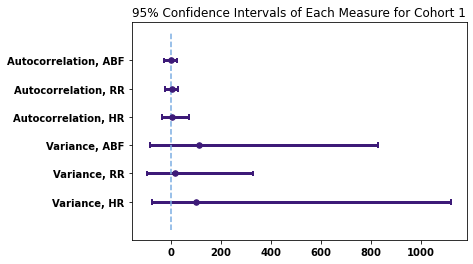

In [133]:
for y, xstart, xstop, mean in zip(range(6), c1_intervals["lower"], c1_intervals["upper"], c1_intervals["mean"]):
    plt.hlines(y, xstart, xstop, lw=3, color='#3d1a78')
    plt.vlines(xstart, y+0.1, y-0.1, lw=2, color='#3d1a78')
    plt.vlines(xstop, y+0.1, y-0.1, lw=2, color='#3d1a78')
    plt.plot(mean, y, '.', markersize = 11, color='#3d1a78')

names = ["Variance, HR", "Variance, RR", "Variance, ABF", "Autocorrelation, HR", "Autocorrelation, RR", "Autocorrelation, ABF"]
plt.vlines(0, -1, 6, linestyle='--', color='#7bade2')
plt.yticks(range(6), names, fontweight='bold') 
plt.xticks(fontweight='bold')
plt.title(r"95% Confidence Intervals of Each Measure for Cohort 1")
# plt.ylabel("       Variance    Autocorrelation", fontweight='bold')

Text(0.5, 1.0, '95% Confidence Intervals of Each Measure for Cohort 3')

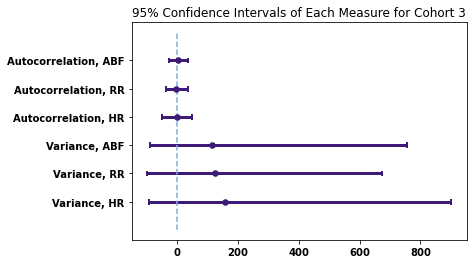

In [134]:
for y, xstart, xstop, mean in zip(range(6), c3_intervals["lower"], c3_intervals["upper"], c3_intervals["mean"]):
    plt.hlines(y, xstart, xstop, lw=3, color='#3d1a78')
    plt.vlines(xstart, y+0.1, y-0.1, lw=2, color='#3d1a78')
    plt.vlines(xstop, y+0.1, y-0.1, lw=2, color='#3d1a78')
    plt.plot(mean, y, '.', markersize = 11, color='#3d1a78')

names = ["Variance, HR", "Variance, RR", "Variance, ABF", "Autocorrelation, HR", "Autocorrelation, RR", "Autocorrelation, ABF"]
plt.vlines(0, -1, 6, linestyle='--', color='#7bade2')
plt.yticks(range(6), names, fontweight='bold') 
plt.xticks(fontweight='bold')
plt.title(r"95% Confidence Intervals of Each Measure for Cohort 3")
# plt.ylabel("       Variance    Autocorrelation", fontweight='bold')

In [29]:
print(hyp_test(hr_averages_c1["var_percent_increase"]))
print(hyp_test(rr_averages_c1["var_percent_increase"]))
print(hyp_test(abf_averages_c1["var_percent_increase"]))
print(hyp_test(hr_averages_c1["ac_percent_increase"]))
print(hyp_test(rr_averages_c1["ac_percent_increase"]))
print(hyp_test(abf_averages_c1["ac_percent_increase"]))

The confidence interval is (-77.62308207036948,1221.9696002979763)
The confidence interval is (-96.49963717699833,361.139414992112)
The confidence interval is (-85.34773791535072,888.4748329790332)
The confidence interval is (-35.46865150980062,121.06053808328404)
The confidence interval is (-24.422365668968975,32.53065594653615)
The confidence interval is (-29.229154062340466,51.85606495623402)


In [30]:
print(hyp_test(hr_averages_c3["var_percent_increase"]))
print(hyp_test(rr_averages_c3["var_percent_increase"]))
print(hyp_test(abf_averages_c3["var_percent_increase"]))
print(hyp_test(hr_averages_c3["ac_percent_increase"]))
print(hyp_test(rr_averages_c3["ac_percent_increase"]))
print(hyp_test(abf_averages_c3["ac_percent_increase"]))

The confidence interval is (-94.6479092090067,1012.2019775274302)
The confidence interval is (-99.969581735879,1158.9264626256286)
The confidence interval is (-90.18157817395443,1251.9188517773805)
The confidence interval is (-49.294487456342935,65.88852062477152)
The confidence interval is (-50.58934920256689,42.21575134332262)
The confidence interval is (-27.63710072936983,67.84653590709173)


In [31]:
pd.DataFrame(hr_averages_c3["var_percent_increase"])["var_percent_increase"]

1      -22.009559
2      396.802470
4       10.921128
5      349.323120
6       10.149739
          ...    
209    -76.180239
210     51.049285
211    -36.498939
212    313.555707
213      4.383234
Name: var_percent_increase, Length: 158, dtype: float64

(array([157.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.00000000e+02,  5.90403365e+15,  1.18080673e+16,  1.77121010e+16,
         2.36161346e+16,  2.95201683e+16,  3.54242019e+16,  4.13282356e+16,
         4.72322692e+16,  5.31363029e+16,  5.90403365e+16,  6.49443702e+16,
         7.08484038e+16,  7.67524375e+16,  8.26564711e+16,  8.85605048e+16,
         9.446

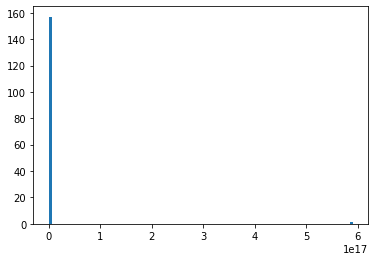

In [32]:
plt.hist(pd.DataFrame(hr_averages_c3["var_percent_increase"])["var_percent_increase"],bins=100)

In [33]:
()

()